In [1]:
# Import libraries

from khantools import *
import pandas as pd
import numpy as np
import missingno
import pprint as pp
import matplotlib.pyplot as plt
import operator as operator
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# Evaluate empty columns
def cols_with_data(dataframe,threshold,plot=False,axis=0):
    ''' returns a series with all columns that are filled to at least threshold percentage or higher'''
    
    counts = dataframe.count(axis=axis).sort_values()
    
    if axis == 0: 
        counts = counts/len(dataframe)
    else:
        counts = counts/len(dataframe.columns)
        
    non_zero_cols = counts[counts >= threshold ]
    
    if plot == True:
        fig,ax = plt.subplots()
        ax.barh(non_zero_cols.index,non_zero_cols)
        fig.set_size_inches(6,9)
        fig.show()
        print("Features left:{}".format(len(non_zero_cols)))
    return non_zero_cols

def value_counts (df,value, oper):
    ''' takes in a datframe of float values, returns count of zero values '''
    dict = {}
    
    ops = {'>': operator.gt,
           '<': operator.lt,
           '>=': operator.ge,
           '<=': operator.le,
           '=': operator.eq}
    
    for col in df.columns:
        matches = sum(ops[oper](df[col],value))
        
        dict[col] = matches
    
    df = pd.Series(dict)
    return df


In [4]:
df = pd.read_excel('dataset.xlsx')
report_prelim = report1(df,5)
display(report_prelim)

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,4nth_value_%,5nth_value,5nth_value_%
"Patient addmited to intensive care unit (1=yes, 0=no)",int64,0.00,2,0,99.27,1,0.73,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to semi-intensive unit (1=yes, 0=no)",int64,0.00,2,0,99.11,1,0.89,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",int64,0.00,2,0,98.60,1,1.40,NaN,NaN,NaN,NaN,NaN,NaN
SARS-Cov-2 exam result,object,0.00,2,negative,90.11,positive,9.89,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 2,object,76.05,1,not_detected,23.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bordetella pertussis,object,76.05,2,not_detected,23.92,detected,0.04,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 1,object,76.05,2,not_detected,23.90,detected,0.05,NaN,NaN,NaN,NaN,NaN,NaN
CoronavirusOC43,object,76.05,2,not_detected,23.81,detected,0.14,NaN,NaN,NaN,NaN,NaN,NaN
Chlamydophila pneumoniae,object,76.05,2,not_detected,23.80,detected,0.16,NaN,NaN,NaN,NaN,NaN,NaN
Coronavirus229E,object,76.05,2,not_detected,23.80,detected,0.16,NaN,NaN,NaN,NaN,NaN,NaN


It appears that the most commonly occuring values aside from the ones that are always there is what appears to be a battery of standard tests. I think it might be a good idea to discard all the rows where these tests were not performed, as they are much too sparse to be of any use to us. Lets keep only rows where standard tests were done, and see if that leaves us with enough data to make a meaningful model. 

In [5]:
df = df[df['Parainfluenza 2'].notnull()]
report_post_trim = report1(df,6)
print(len(df))
display(report_post_trim)

1352


,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,4nth_value_%,5nth_value,5nth_value_%,6nth_value,6nth_value_%
Parainfluenza 2,object,0.00,1,not_detected,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bordetella pertussis,object,0.00,2,not_detected,99.85,detected,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 1,object,0.00,2,not_detected,99.78,detected,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CoronavirusOC43,object,0.00,2,not_detected,99.41,detected,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamydophila pneumoniae,object,0.00,2,not_detected,99.33,detected,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coronavirus229E,object,0.00,2,not_detected,99.33,detected,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 3,object,0.00,2,not_detected,99.26,detected,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adenovirus,object,0.00,2,not_detected,99.04,detected,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metapneumovirus,object,0.00,2,not_detected,98.96,detected,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Influenza A,object,0.00,2,not_detected,98.67,detected,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Good, we have 1300 or so rows and can use this as a dataset. Now lets look at the datatypes of the columns. 

In [6]:
data_types = report_post_trim.groupby('type').count()

Only four integer types. We shoudl probably convert these to floats or objects. Lets see what they are. 

In [7]:
int_features = report_prelim[report_prelim['type'] == 'int64']['type']
display(int_features)

Patient addmited to intensive care unit (1=yes, 0=no)    int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    int64
Patient addmited to regular ward (1=yes, 0=no)           int64
Patient age quantile                                     int64
Name: type, dtype: object

Now lets clean up our dataframe a bit by renaming some columns, consolidating the three target columns into one and converting the age_quant column to float. Lets also create lists of features and subsets of features based on data types and other criteria. 

In [8]:

# Lets change the names of some columns to something easier to work with
new_names = {
    'Patient addmited to intensive care unit (1=yes, 0=no)':'intensive',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)':'semi_int',
    'Patient addmited to regular ward (1=yes, 0=no)':'reg_ward',
    'SARS-Cov-2 exam result':'sars_cov2',
    'Patient age quantile':'age_quant',
    'Patient ID':'patient_id'
}

df = df.rename(columns=new_names)
df.set_index(keys='patient_id',inplace=True)

# create one target column 

admission_features = ['intensive','semi_int','reg_ward']

for feat in admission_features:
    df.loc[df[feat] == 1,'adm_status'] = feat

df['adm_status'].fillna(value='not_adm',inplace=True)
df = df.drop(columns=admission_features)

# convert age_quant to float

df['age_quant'] = df['age_quant'].astype(float)
#delete empty columns

empty_cols = list(report_post_trim[report_post_trim['% empty'] == 100.0].index)
df = df.drop(columns=empty_cols)
# Lists of target columns, feature columns and subsets of features


# all features

df_features = df.drop(['adm_status'],axis=1)
orig_features = list(df_features.columns)
features = orig_features.copy()

#subset features
df_types = df_features.dtypes

# float features

float_features = list(df_types[df_types == 'float64'].index)

# object features
obj_features = list(df_types[df_types == 'object'].index)

# some important features
high_imp= ['Lactic Dehydrogenase','Lymphocytes','Proteina C reativa mg/dL']



In [9]:
print(empty_cols)

['Mycoplasma pneumoniae', 'Fio2 (venous blood gas analysis)', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer']


# Divide and Analyze the Dataset

In [10]:
# split up df into traches (admitted, semi intensive et, etc. )

df_admit = df[df['adm_status'] == 'reg_ward']
df_semi = df[df['adm_status'] == 'semi_int']
df_intense = df[df['adm_status'] == 'intensive']

df_hosp = pd.concat([df_admit,df_semi,df_intense])
df_not_adm = df[~df.index.isin(df_hosp.index)]

adm_pats = set(df_admit.index)
semi_pats = set(df_semi.index)
intense_pats = set(df_intense.index)

semi_pats.issubset(adm_pats)
semi_not_admitted = list(np.setdiff1d(semi_pats,adm_pats)[0])

intense_pats.issubset(adm_pats)
intense_not_admitted = list(np.setdiff1d(intense_pats,adm_pats)[0])



In [11]:
display(df.head())

,age_quant,sars_cov2,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),adm_status
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17.0,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_adm
d9e41465789c2b5,15.0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_adm
8bb9d64f0215244,1.0,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.36455,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132,NaN,NaN,-0.586821,-0.1622,NaN,NaN,NaN,NaN,NaN,0.724353,NaN,1.075153,0.615594,-0.554737,-0.283748,-

## In the entire Dataset( Admitted + not admitted patients)

Features left:68


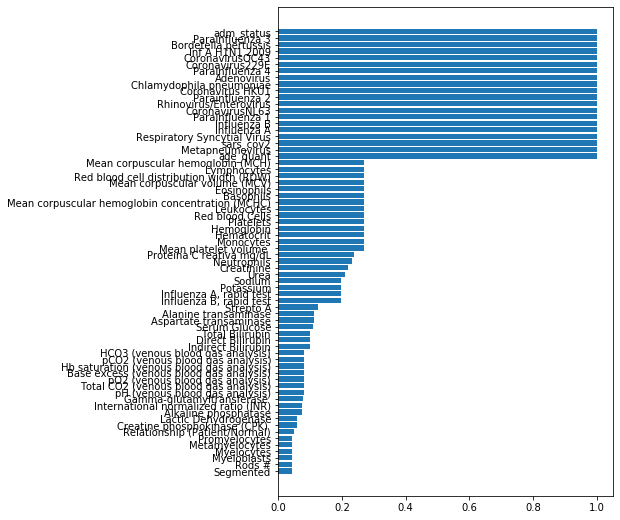

In [12]:
# all data: filled values in each column 
threshold = 0.03
empties = cols_with_data(df,threshold=0.03,plot=True)

## Not Hospitalized Patients

Features left:84


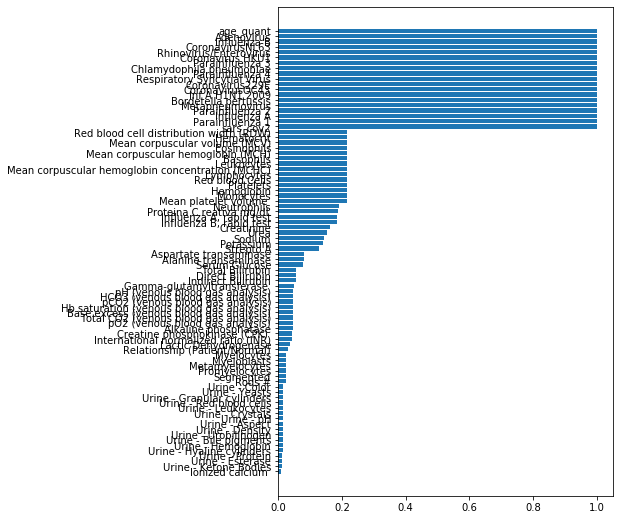

In [13]:
# not admitted patients: filled values in each column 

df_not_adm_features_only = df_not_adm[orig_features]
thresh = 0.01

empties_no_adm = cols_with_data(df_not_adm_features_only,threshold=thresh,plot=True)

In [14]:
# Lets store these and compare them to admitted features see if most common ones 
non_adm_feats = list(empties_no_adm.index)

## Admitted Patients

Features left:92


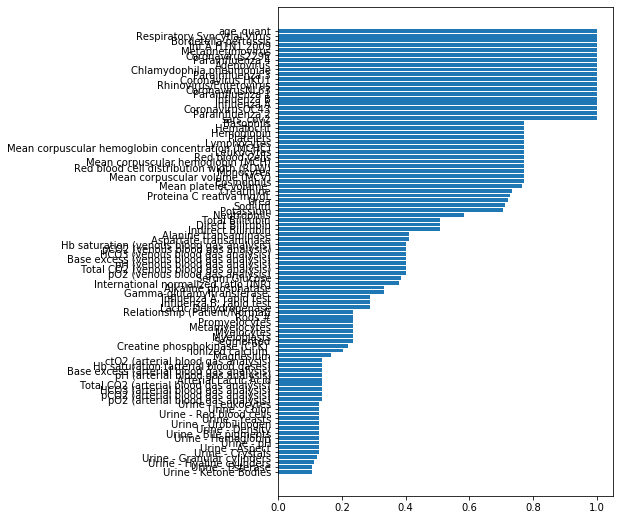

In [15]:
# most common features in admitted patients
df_adm = df_hosp[features]
thresh = 0.10

adm_highest_feats = cols_with_data(df_adm,thresh,plot=True)
adm_feats = list(adm_highest_feats.index)

# Convert categoricals

In [16]:
report2 = report1(df[obj_features],3).sort_values('unique values')
display(report2)

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%
Parainfluenza 2,object,0.00,1,not_detected,100.00,NaN,NaN,NaN,NaN
Urine - Hyaline cylinders,object,97.63,1,absent,2.37,NaN,NaN,NaN,NaN
Urine - Granular cylinders,object,97.49,1,absent,2.51,NaN,NaN,NaN,NaN
Urine - Yeasts,object,97.41,1,absent,2.59,NaN,NaN,NaN,NaN
Urine - Nitrite,object,99.93,1,not_done,0.07,NaN,NaN,NaN,NaN
Chlamydophila pneumoniae,object,0.00,2,not_detected,99.33,detected,0.67,NaN,NaN
Urine - Protein,object,98.08,2,absent,1.85,not_done,0.07,NaN,NaN
Urine - Ketone Bodies,object,97.93,2,absent,2.00,not_done,0.07,NaN,NaN
Urine - Esterase,object,97.86,2,absent,2.07,not_done,0.07,NaN,NaN
Bordetella pertussis,object,0.00,2,not_detected,99.85,detected,0.15,NaN,NaN


Lets also drop all the unary features because it seems they are all basically negative and dont seem to add much information.

Lets convert the binary categoricals to floats. 

For tests that have a 'not done' value, I will treat 'not done' as negative, since its safe to assume if t he test wasnt done the doctor was expecting a negative anyways. 

Urine Aspect color and crystals I will drop. They dont sound too important, and dont comprise alot of rows.I will also drop standard tests, as I feel they will only add noise.  

Urine PH and Urine Leukocytes should be converted to float



In [17]:
binary_conversions = list(report2[report2['unique values'] == 2].index)
unary_conversions = list(report2[report2['unique values'] == 1].index)
ternary_reduction = ['Strepto A','Urine - Hemoglobin']
bad_features = ['Urine - Aspect','Urine - Color','Urine - Crystals']
conv_to_float = ['Urine - pH', 'Urine - Leukocytes']


df2 = df.copy()

for col in binary_conversions:
    df2[col] = df2[col].replace(['not_detected','negative','absent','normal'],0)
    df2[col] = df2[col].replace(['detected','positive','not_done'],1)
    df2[col] = df2[col].astype(float)
for col in ternary_reduction:
    df2[col] = df2[col].replace(['negative','absent','not_done'],0)
    df2[col] = df2[col].replace(['present','positive'],1)
    df2[col] = df2[col].astype(float)

df2['sars_cov2'] = df2['sars_cov2'].replace(['negative'],0)
df2['sars_cov2'] = df2['sars_cov2'].replace(['positive'],1)

df2['Urine - pH'] = df2['Urine - pH'].replace(['Não Realizado'],5.0)
df2['Urine - pH'] = df2['Urine - pH'].astype(float)

df2['Urine - Leukocytes'] = df2['Urine - Leukocytes'].replace('<1000',1000)
df2['Urine - Leukocytes'] = df2['Urine - Leukocytes'].astype(float)

#update our list of feature types to choose the right regression model later
bad_set = set(bad_features) | set(unary_conversions) | set(conv_to_float) 

features = list(set(features) - bad_set)  

obj_features = list( set(obj_features) - bad_set) 
float_features = list(set(features) - set(obj_features))


df2.drop(list(bad_set),axis=1, inplace = True)


In [18]:
report3 = report1(df2,6)
display(report3)

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,4nth_value_%,5nth_value,5nth_value_%,6nth_value,6nth_value_%
Bordetella pertussis,float64,0.00,2,0,99.85,1,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 1,float64,0.00,2,0,99.78,1,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CoronavirusOC43,float64,0.00,2,0,99.41,1,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamydophila pneumoniae,float64,0.00,2,0,99.33,1,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coronavirus229E,float64,0.00,2,0,99.33,1,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 3,float64,0.00,2,0,99.26,1,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adenovirus,float64,0.00,2,0,99.04,1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metapneumovirus,float64,0.00,2,0,98.96,1,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Influenza A,float64,0.00,2,0,98.67,1,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parainfluenza 4,float64,0.00,2,0,98.59,1,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fill In Empties

Features left:73


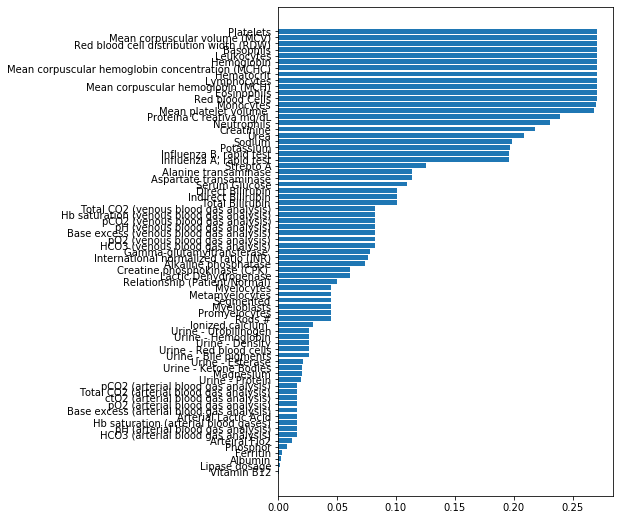

In [19]:
# lets start with out base features that have no missinfg values
report4 = cols_with_data(df2[features],1)
full_feats = list(report4.sort_values().index)

report5 = cols_with_data(df2[features].drop(full_feats,axis=1),0,plot=True).sort_values(ascending=False)
ranked_features = list(report5.index)


In [20]:
print(full_feats)

['Metapneumovirus', 'Coronavirus229E', 'Influenza A', 'CoronavirusOC43', 'Parainfluenza 4', 'Rhinovirus/Enterovirus', 'Bordetella pertussis', 'Respiratory Syncytial Virus', 'age_quant', 'Parainfluenza 1', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'CoronavirusNL63', 'Adenovirus', 'Influenza B', 'Inf A H1N1 2009', 'sars_cov2']


In [21]:
filled_feats = full_feats.copy()
df3 = df2.copy()

In [22]:
df3 = df2.copy()
filled_feats = full_feats.copy()
y_hats = []

for feature in ranked_features:
    df_vals_present = df3.loc[df3[feature].notnull()]
    
    X = df_vals_present[filled_feats]
    y = df_vals_present[feature]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if feature in float_features:
        pipe = LinearRegression()
       
        
    elif feature in obj_features:
        
        pipe = LogisticRegression()
        
    
    pipe.fit(X,y)
    
    df_predictors = df3.loc[df3[feature].isna()][filled_feats]
    y_hat = pipe.predict(df_predictors)
    
    df3.loc[df3[feature].isna(),feature] = y_hat
    
    
    
    filled_feats.append(feature)
    
    y_hats.append(y_hat)
    
    
    
    

/home/khan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [23]:
display(report1(df3,4))

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,4nth_value_%
Myeloblasts,float64,0.0,1,0,100.00,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin B12,float64,0.0,1,0.869795,100.00,NaN,NaN,NaN,NaN,NaN,NaN
Bordetella pertussis,float64,0.0,2,0,99.85,1,0.15,NaN,NaN,NaN,NaN
Parainfluenza 1,float64,0.0,2,0,99.78,1,0.22,NaN,NaN,NaN,NaN
CoronavirusOC43,float64,0.0,2,0,99.41,1,0.59,NaN,NaN,NaN,NaN
Coronavirus229E,float64,0.0,2,0,99.33,1,0.67,NaN,NaN,NaN,NaN
Chlamydophila pneumoniae,float64,0.0,2,0,99.33,1,0.67,NaN,NaN,NaN,NaN
Parainfluenza 3,float64,0.0,2,0,99.26,1,0.74,NaN,NaN,NaN,NaN
Adenovirus,float64,0.0,2,0,99.04,1,0.96,NaN,NaN,NaN,NaN
Metapneumovirus,float64,0.0,2,0,98.96,1,1.04,NaN,NaN,NaN,NaN


In [ ]:
display(df3[filled_feats])

In [ ]:
print(filled_feats)

In [ ]:
! git add .
! git commit -m "4/30 4:50am"